In [41]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

In [42]:
# load data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
data_values = dataframe.values # 768 samples, 9 features

In [43]:
print(data_values)
print(data_values.shape)

[[   6.     148.      72.    ...,    0.627   50.       1.   ]
 [   1.      85.      66.    ...,    0.351   31.       0.   ]
 [   8.     183.      64.    ...,    0.672   32.       1.   ]
 ..., 
 [   5.     121.      72.    ...,    0.245   30.       0.   ]
 [   1.     126.      60.    ...,    0.349   47.       1.   ]
 [   1.      93.      70.    ...,    0.315   23.       0.   ]]
(768, 9)


In [70]:
feature_matrix = data_values[:,0:8]
labels = data_values[:,8]

print(len(labels))

768


In [71]:
train_features = feature_matrix[:450]
train_labels = labels[:450]

test_features = feature_matrix[450:]
test_labels = labels[450:]

In [72]:
clf = DecisionTreeClassifier(max_depth=9, min_samples_leaf=1)
clf.fit(train_features,train_labels)
clf_error_train = clf.score(train_features, train_labels)
clf_error_test = clf.score(test_features,test_labels)

In [74]:
def get_error_rate(pred, Y):
    return sum(pred != Y) / float(len(Y))

In [76]:
def plot_error_rate(er_train, er_test):
    df_error = pd.DataFrame([er_train, er_test]).T
    df_error.columns = ['Training', 'Test']
    plot1 = df_error.plot(linewidth = 3, figsize = (8,6),
            color = ['lightblue', 'darkblue'], grid = True)
    plot1.set_xlabel('Number of iterations', fontsize = 12)
    plot1.set_xticklabels(range(0,450,50))
    plot1.set_ylabel('Error rate', fontsize = 12)
    plot1.set_title('Error rate vs number of iterations', fontsize = 16)
    plt.axhline(y=er_test[0], linewidth=1, color = 'red', ls = 'dashed')
    plt.show()

In [1]:
""" ADABOOST IMPLEMENTATION ================================================="""
def adaboost_clf(train_features, train_labels, test_features, test_labels, M, clf):
    n_train, n_test = len(train_features), len(test_features)
    # Initialize weights
    w = np.ones(n_train) / n_train
    #Create two lists with a specific length for the predictions
    pred_train, pred_test = [np.zeros(n_train), np.zeros(n_test)]
    
    for i in range(M):
        # Fit a classifier with the specific weights
        clf.fit(train_features, train_labels, sample_weight = w)
        pred_train_i = clf.predict(train_features)
        pred_test_i = clf.predict(test_features)
        # Indicator function
        miss = [int(x) for x in (pred_train_i != train_labels)]
        # Equivalent with 1/-1 to update weights
        miss2 = [x if x==1 else -1 for x in miss]
        # Error
        err_m = np.dot(w,miss) / sum(w)
        # Alpha
        alpha_m = 0.5 * np.log( (1 - err_m) / float(err_m))
        # New weights
        w = np.multiply(w, np.exp([float(x) * alpha_m for x in miss2]))
        # Add to prediction
        pred_train = [sum(x) for x in zip(pred_train, 
                                          [x * alpha_m for x in pred_train_i])]
        pred_test = [sum(x) for x in zip(pred_test, 
                                         [x * alpha_m for x in pred_test_i])]
    
    pred_train, pred_test = np.sign(pred_train), np.sign(pred_test)
    # Return error rate in train and test set
    return get_error_rate(pred_train, train_labels), \
           get_error_rate(pred_test, test_labels)

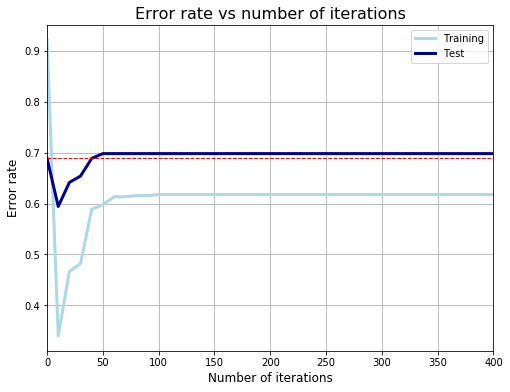

In [77]:
er_train, er_test = [clf_error_train], [clf_error_test]
# Fit Adaboost classifier using a decision tree as base estimator
 # Test with different number of iterations
x_range = range(10, 410, 10)
for i in x_range:    
        er_i = adaboost_clf(train_features, train_labels, test_features, test_labels, i, clf)
        er_train.append(er_i[0])
        er_test.append(er_i[1])
    
# Compare error rate vs number of iterations
plot_error_rate(er_train, er_test)